In [1]:
%matplotlib inline

import collections
import json
import matplotlib.pyplot as plt
import os

from model.index import Index

## Check if a link is in our model.

In [10]:
links_in_model = set(json.load(open(os.path.join('data', 'links_in_model.json'))))

In [11]:
print len(links_in_model)

2118605


In [12]:
print 'https://github.com/torvalds/linux' in links_in_model

True


## Inverted Index Statistics

In [7]:
index = Index(os.path.join('model', 'index'), 250e6)

Number of indexes loaded: 1
Cache size: 17304326


In [4]:
index_lengths = []
counter = 0
for key in index:
    index_lengths.append(len(index[key]))
    
    counter += 1
    if counter % 100000 == 0:
        print counter

NameError: name 'index' is not defined

3012280
1183638
999
99.5775957082


(array([  2.81426900e+06,   7.57610000e+04,   3.03680000e+04,
          1.64540000e+04,   1.14040000e+04,   8.18400000e+03,
          5.66200000e+03,   4.54700000e+03,   4.24700000e+03,
          3.12900000e+03,   2.50900000e+03,   1.94000000e+03,
          1.83200000e+03,   1.46300000e+03,   1.39900000e+03,
          1.52400000e+03,   1.32600000e+03,   1.08800000e+03,
          1.08100000e+03,   8.50000000e+02,   7.81000000e+02,
          6.84000000e+02,   6.79000000e+02,   5.78000000e+02,
          5.92000000e+02,   5.23000000e+02,   5.05000000e+02,
          4.92000000e+02,   4.40000000e+02,   4.03000000e+02,
          3.77000000e+02,   3.23000000e+02,   3.30000000e+02,
          3.32000000e+02,   2.66000000e+02,   3.09000000e+02,
          2.82000000e+02,   2.82000000e+02,   2.37000000e+02,
          2.40000000e+02,   2.16000000e+02,   2.06000000e+02,
          2.16000000e+02,   1.91000000e+02,   1.69000000e+02,
          1.69000000e+02,   1.86000000e+02,   1.81000000e+02,
        

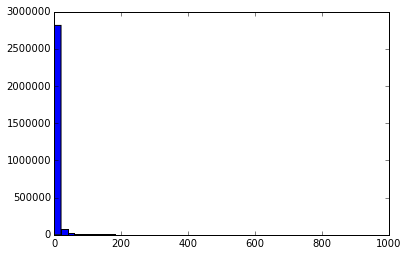

In [31]:
print len(index_lengths)
print max(index_lengths) # 1183638

culled_lengths = [i for i in index_lengths if i < 1000]
print max(culled_lengths)
print len(culled_lengths) * 100.0 / len(index_lengths)

plt.hist(culled_lengths, bins = 50)

## Id to link

In [2]:
id_to_link_map = json.load(open(os.path.join('data', 'id_to_link_map.json')))

In [4]:
for repo_id in id_to_link_map:
    if 'listofgithub' in id_to_link_map[repo_id].lower():
        print repo_id, id_to_link_map[repo_id]

11379725 https://github.com/kf4jas/ListOfGithubLists
11379026 https://github.com/atlkrunk/ListOfGithubLists
7939665 https://github.com/asciimoo/ListOfGithubLists
11379348 https://github.com/andrewgjohnson-forks/ListOfGithubLists
11385258 https://github.com/z3i/ListOfGithubLists
11391658 https://github.com/Cybuster/ListOfGithubLists


In [24]:
other_http_counts = []
other_https_counts = []

awesome_http_counts = []
awesome_https_counts = []

total = collections.defaultdict(int)

to_check = set()
for k in id_to_link_map:
    if 'awesome' in id_to_link_map[k]:
        to_check.add(int(k))
        
for t in index['http']:
    if int(t[0]) in to_check:
        awesome_http_counts.append(t[1])
        total[t[0]] += t[1]
    else:
        other_http_counts.append(t[1])
        
                
for t in index['https']:
    if int(t[0]) in to_check:
        awesome_https_counts.append(t[1])
        total[t[0]] += t[1]
    else:
        other_https_counts.append(t[1])

4316


(array([  2.94574300e+06,   8.43800000e+03,   1.65000000e+03,
          4.93000000e+02,   3.95000000e+02,   4.93000000e+02,
          5.25000000e+02,   6.27000000e+02,   2.74000000e+02,
          6.30000000e+01,   0.00000000e+00,   3.30000000e+01,
          3.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.50000000e+01,   9.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   6.00000000e+00,
          0.00000000e+00,   8.40000000e+01,   1.80000000e+01,
          9.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   4.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

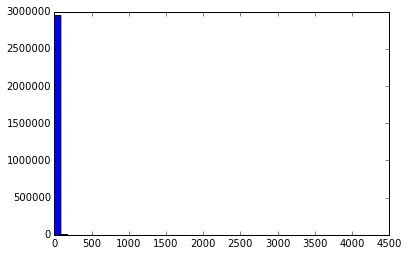

In [17]:
print max(other_http_counts)
plt.hist(other_http_counts, bins=50)

(array([  1.83785300e+06,   2.48739000e+05,   6.91090000e+04,
          2.60020000e+04,   1.34300000e+04,   7.16300000e+03,
          3.88000000e+03,   3.11000000e+03,   2.24800000e+03,
          1.27400000e+03,   1.62000000e+03,   6.92000000e+02,
          7.08000000e+02,   5.74000000e+02,   4.00000000e+02,
          3.01000000e+02,   1.00000000e+02,   3.16000000e+02,
          4.33000000e+02,   5.62000000e+02,   1.73000000e+02,
          6.65000000e+02,   1.01000000e+02,   6.60000000e+01,
          6.69000000e+02,   6.20000000e+01,   1.71000000e+02,
          1.18000000e+02,   1.38000000e+02,   1.65000000e+02,
          4.00000000e+01,   7.80000000e+01,   5.40000000e+01,
          4.20000000e+01,   2.56000000e+02,   7.20000000e+01,
          3.90000000e+01,   9.00000000e+01,   6.80000000e+01,
          1.74000000e+02,   2.49000000e+02,   1.33000000e+02,
          3.10000000e+01,   5.80000000e+01,   2.04000000e+02,
          1.20000000e+01,   6.40000000e+01,   6.00000000e+00,
        

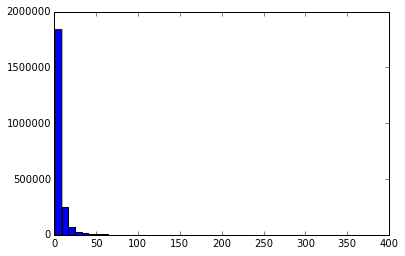

In [22]:
plt.hist([i for i in other_https_counts if i < 400], bins=50)

(array([ 2300.,   503.,   281.,   150.,   118.,   194.,   202.,   148.,
          129.,   109.,   126.,    93.,   105.,    30.,    42.,   120.,
           15.,    18.,    18.,    21.,    12.,    21.,     0.,    18.,
            3.,   207.,   233.,   222.,    49.,    21.,    35.,    14.,
           62.,    57.,   185.,   219.,     9.,    81.,   222.,   189.,
          377.,    24.,    15.,   141.,   177.,     6.,    48.,     6.,
            3.,    27.]),
 array([   1.  ,    6.26,   11.52,   16.78,   22.04,   27.3 ,   32.56,
          37.82,   43.08,   48.34,   53.6 ,   58.86,   64.12,   69.38,
          74.64,   79.9 ,   85.16,   90.42,   95.68,  100.94,  106.2 ,
         111.46,  116.72,  121.98,  127.24,  132.5 ,  137.76,  143.02,
         148.28,  153.54,  158.8 ,  164.06,  169.32,  174.58,  179.84,
         185.1 ,  190.36,  195.62,  200.88,  206.14,  211.4 ,  216.66,
         221.92,  227.18,  232.44,  237.7 ,  242.96,  248.22,  253.48,
         258.74,  264.  ]),
 <a list of 50 Pa

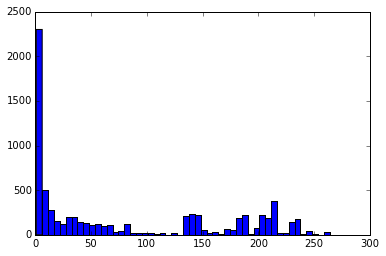

In [18]:
plt.hist(awesome_http_counts, bins=50)

(array([ 2125.,  1530.,   594.,   504.,   363.,    78.,   246.,    75.,
          171.,   456.,   304.,   237.,    66.,   183.,   105.,     3.,
            0.,     3.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     3.,     0.,     0.,     0.,
           15.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     3.]),
 array([  1.00000000e+00,   3.03800000e+01,   5.97600000e+01,
          8.91400000e+01,   1.18520000e+02,   1.47900000e+02,
          1.77280000e+02,   2.06660000e+02,   2.36040000e+02,
          2.65420000e+02,   2.94800000e+02,   3.24180000e+02,
          3.53560000e+02,   3.82940000e+02,   4.12320000e+02,
          4.41700000e+02,   4.71080000e+02,   5.00460000e+02,
          5.29840000e+02,   5.59220000e+02,   5.88600000e+02,
          6.17980000e+02,   6.47360000e+02,   6.76740000e+02,
          7.06120000e+02,   7.35500000e+02,   

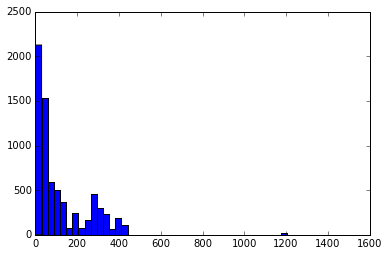

In [20]:
plt.hist(awesome_https_counts, bins=50)

(array([ 968.,  271.,  108.,   75.,   98.,  123.,  108.,   88.,  297.,
          44.,   40.,   23.,   26.,   66.,  138.,   75.,   30.,   48.,
           8.,   11.,   32.,   55.,    3.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           1.,    0.,    0.,    0.,    5.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([  1.00000000e+00,   1.21380000e+02,   2.41760000e+02,
          3.62140000e+02,   4.82520000e+02,   6.02900000e+02,
          7.23280000e+02,   8.43660000e+02,   9.64040000e+02,
          1.08442000e+03,   1.20480000e+03,   1.32518000e+03,
          1.44556000e+03,   1.56594000e+03,   1.68632000e+03,
          1.80670000e+03,   1.92708000e+03,   2.04746000e+03,
          2.16784000e+03,   2.28822000e+03,   2.40860000e+03,
          2.52898000e+03,   2.64936000e+03,   2.76974000e+03,
          2.89012000e+03,   3.01050000e+03,   3.13088000e+03,
          3.25126000e+03,   3.37164000e+03

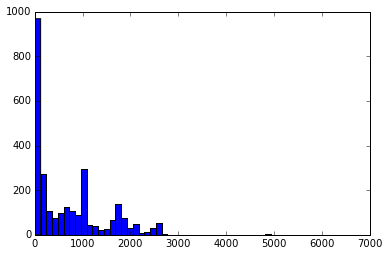

In [26]:
plt.hist(total.values(), bins=50)

In [8]:
flagged_as_non_repo = set()

for t in index['http']:
    if t[1] >= 50:
        flagged_as_non_repo.add(str(t[0]))
        
                
for t in index['https']:
    if t[1] >= 50:
        flagged_as_non_repo.add(str(t[0]))
        
print len(flagged_as_non_repo)

json.dump(list(flagged_as_non_repo), open(os.path.join('data', 'flagged_as_non_repo.json'), 'w+'))

18523
